In [ ]:
import random 
import math

def foodGenerator(root_coords, num_of_food, sensor_length, num_sensors ):
    # num_sensors = 8

    agent_pos = root_coords
    first_food = random.randint(0,num_sensors-1)  # Randomly select a sensor to place the first food item
    
    #coordinate of first food 

    angle = 2 * math.pi * first_food / num_sensors
    x1 = agent_pos[0] + sensor_length * math.cos(angle)
    y1 = agent_pos[1] + sensor_length * math.sin(angle)

    food_coords = [(x1,y1)]

    #each food item is a node and each node can have children. track each node's children and what sensor was used to generate each child
    food_children = {}
    #keep track of viable parents. these are nodes with less than 3 children that can have more children. Also keep track of what sensor this was made on
    viable_parents = [(x1,y1,first_food)]
    edges = []

    while len(food_coords) < num_of_food:
        #pick a random viable parent and update agent position as this coordinate and store the sensor that was used to generate this food
        _ = viable_parents[random.randint(0,len(viable_parents)-1)]
        agent_pos = (_[0], _[1])
        sensor = _[2]
        #if this parent has children, check if either sensors sensor, sensor+1 and sensor-1 are available and store them in a list
        available_sensors = []
        for i in range(-1,2):
            #check is sensor + i is occupied by any of the food object's children
            #iterate through food_children[agent_pos] and check if sensor + i is occupied
            occupied = False
            if agent_pos in food_children:
                for child in food_children[agent_pos]:
                    if (child[2] + i) % num_sensors == sensor:
                        occupied = True
                        break
            if not occupied:
                available_sensors.append((sensor + i) % num_sensors)

        #if there are available sensors, pick one at random and generate a new food object
        if len(available_sensors) > 0:
            new_sensor = available_sensors[random.randint(0,len(available_sensors)-1)]
            angle = 2 * math.pi * new_sensor / num_sensors
            x1 = agent_pos[0] + sensor_length * math.cos(angle)
            y1 = agent_pos[1] + sensor_length * math.sin(angle)
            food_coords.append((x1,y1))
            edges.append((agent_pos,(x1,y1)))
            viable_parents.append((x1,y1,new_sensor))
            if agent_pos in food_children:
                food_children[agent_pos].append((x1,y1,new_sensor))
            else:
                food_children[agent_pos] = [(x1,y1,new_sensor)]
            edges.append((agent_pos,(x1,y1)))
            if len(food_children[agent_pos]) == 3:
                viable_parents.remove((agent_pos[0],agent_pos[1],sensor))
        
        
    edges.append((root_coords, food_coords[0]))
    return food_coords, edges

def bestPathPerNode(edges, root):
    from collections import defaultdict, deque

    tree = defaultdict(list)
    for u, v in edges:
        tree[u].append(v)
        tree[v].append(u)

    depths = {root: 0}
    queue = deque([root])

    while queue:
        node = queue.popleft()
        for neighbor in tree[node]:
            if neighbor not in depths:
                depths[neighbor] = depths[node] + 1
                queue.append(neighbor)

    return depths  # returns dict: {node_position: depth}


In [20]:
import random
import math

def foodGenerator(root_coords, num_of_food, sensor_length, num_sensors):
    def polar_to_cartesian(origin, angle, length):
        return (
            origin[0] + length * math.cos(angle),
            origin[1] + length * math.sin(angle)
        )

    food_coords = [root_coords]
    edges = []
    max_children = 3
    angle_step = 2 * math.pi / num_sensors
    food_tree = {root_coords: []}

    viable_parents = [root_coords]
    angle_offsets = list(range(num_sensors))

    while len(food_coords) < num_of_food and viable_parents:
        parent = random.choice(viable_parents)
        used_angles = [child[1] for child in food_tree[parent]]
        available_angles = [a for a in angle_offsets if a not in used_angles]

        if not available_angles:
            viable_parents.remove(parent)
            continue

        angle_index = random.choice(available_angles)
        angle = angle_index * angle_step
        new_food = polar_to_cartesian(parent, angle, sensor_length)

        # Collision check
        too_close = any(
            math.dist(new_food, existing) < sensor_length * 0.9
            for existing in food_coords
        )
        if too_close:
            available_angles.remove(angle_index)
            continue

        food_coords.append(new_food)
        edges.append((parent, new_food))
        food_tree[parent].append((new_food, angle_index))
        food_tree[new_food] = []
        viable_parents.append(new_food)

        if len(food_tree[parent]) >= max_children:
            viable_parents.remove(parent)

    return food_coords[1:], edges  # Exclude root from food_coords


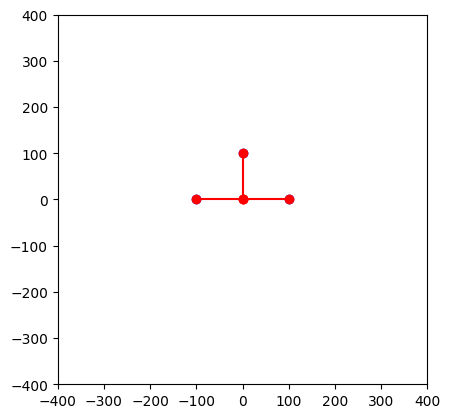

In [29]:
#plot food tree
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    food_coords, edges = foodGenerator((0,0), 4, 100, 4)
    for edge in edges:
        plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], 'ro-')
    plt.scatter(*zip(*food_coords), color='blue')
    plt.xlim(-400, 400)
    plt.ylim(-400, 400)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [9]:
#now print the best path per node 
if __name__ == "__main__":
    from optimalPath import bestPath

    print(bestPathPerNode(edges, (0,0)))
    #plot each path 
    for node, depth in bestPathPerNode(edges, (0,0)).items():
        print(f"Node: {node}, Depth: {depth}")
        plt.text(node[0], node[1], str(depth), fontsize=12, ha='center', va='center', color='black')
    plt.show()

{(0, 0): 0, (70.71067811865476, 70.71067811865474): 1, (170.71067811865476, 70.71067811865474): 2, (241.4213562373095, -2.842170943040401e-14): 3, (270.71067811865476, 70.71067811865474): 3, (241.42135623730948, -100.00000000000003): 4, (341.4213562373095, -2.842170943040401e-14): 4, (241.42135623730945, -200.00000000000003): 5, (312.1320343559642, -170.7106781186548): 5}
Node: (0, 0), Depth: 0
Node: (70.71067811865476, 70.71067811865474), Depth: 1
Node: (170.71067811865476, 70.71067811865474), Depth: 2
Node: (241.4213562373095, -2.842170943040401e-14), Depth: 3
Node: (270.71067811865476, 70.71067811865474), Depth: 3
Node: (241.42135623730948, -100.00000000000003), Depth: 4
Node: (341.4213562373095, -2.842170943040401e-14), Depth: 4
Node: (241.42135623730945, -200.00000000000003), Depth: 5
Node: (312.1320343559642, -170.7106781186548), Depth: 5


MemoryError: std::bad_alloc

<Figure size 640x480 with 1 Axes>

In [6]:
def bestPathPerNode(edges, root):
    from collections import defaultdict, deque

    tree = defaultdict(list)
    for u, v in edges:
        tree[u].append(v)
        tree[v].append(u)

    depths = {root: 0}
    queue = deque([root])

    while queue:
        node = queue.popleft()
        for neighbor in tree[node]:
            if neighbor not in depths:
                depths[neighbor] = depths[node] + 1
                queue.append(neighbor)

    return depths  # returns dict: {node_position: depth}


In [ ]:
#print (bestPathPerNode(edges, (0,0))

In [7]:
agent_pos

(7.071067811865474, -7.071067811865477, 7)

In [2]:
x = {1: (1,2,3)}

In [4]:
x = [(0,0), (1,1)]

In [5]:
x.remove((0,0))
x.remove((1,1))
x

[]

In [6]:
for bh in range(5):
    print(bh)

print("out", bh+1)

0
1
2
3
4
out 5


In [1]:
import pickle 

#load ../best.pickle
with open('../best.pickle', 'rb') as handle:
    best = pickle.load(handle)

In [3]:
dir(best)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_connection',
 'compute_full_connections',
 'configure_crossover',
 'configure_new',
 'connect_fs_neat_hidden',
 'connect_fs_neat_nohidden',
 'connect_full_direct',
 'connect_full_nodirect',
 'connect_partial_direct',
 'connect_partial_nodirect',
 'connections',
 'create_connection',
 'create_node',
 'distance',
 'fitness',
 'key',
 'mutate',
 'mutate_add_connection',
 'mutate_add_node',
 'mutate_delete_connection',
 'mutate_delete_node',
 'nodes',
 'parse_config',
 'size',
 'write_config']